In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import stats

LW=load_wine()
df_wine=pd.DataFrame(data=LW.data,columns=LW.feature_names)
df_wine.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


#Histograma

<Axes: >

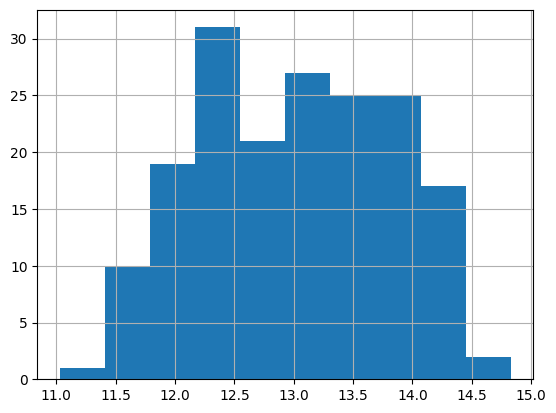

In [3]:
df_wine['alcohol'].hist() #Pandas

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

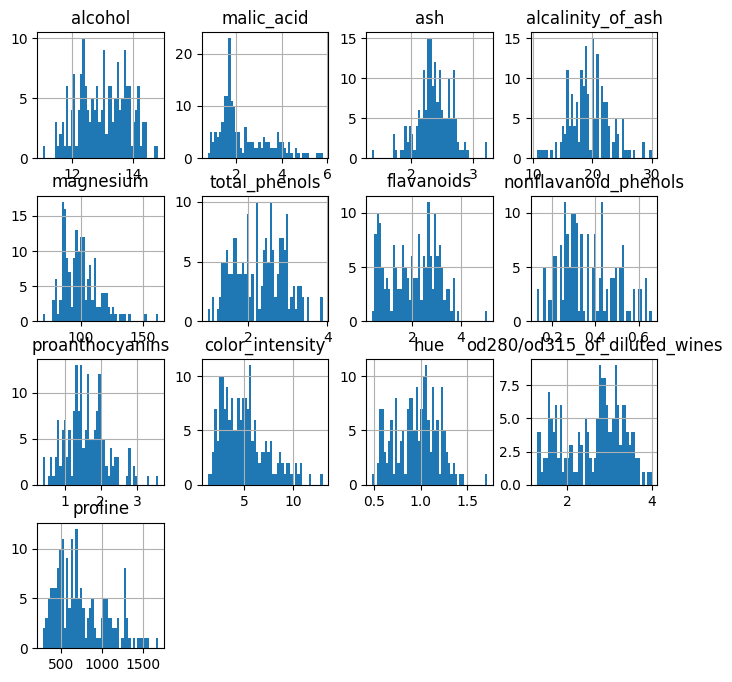

In [4]:
df_wine.hist(figsize=(8,8),bins=50)

(array([ 1.,  0.,  4.,  6.,  8., 11., 14., 17., 10., 11., 15., 12., 12.,
        13., 18.,  7., 11.,  6.,  0.,  2.]),
 array([11.03, 11.22, 11.41, 11.6 , 11.79, 11.98, 12.17, 12.36, 12.55,
        12.74, 12.93, 13.12, 13.31, 13.5 , 13.69, 13.88, 14.07, 14.26,
        14.45, 14.64, 14.83]),
 <BarContainer object of 20 artists>)

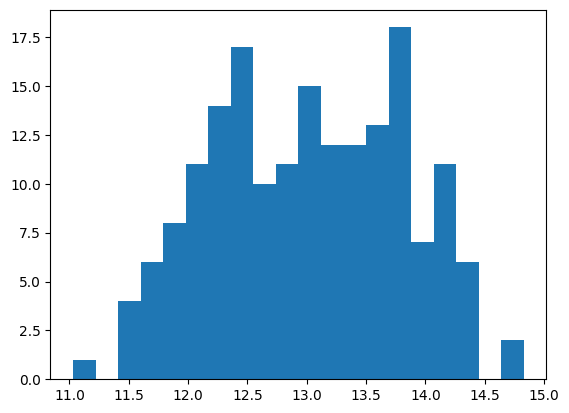

In [5]:
plt.hist(df_wine['alcohol'], bins=20) #mathplotlib

#Medidas de posición

##Media aritmética

In [6]:
#Desde numpy
np.mean(df_wine['alcohol'])

13.00061797752809

In [7]:
np.mean(df_wine,axis=0) #axis=0 hace el barrido por filas (axis=1, lo hace por columnas)

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [8]:
#Desde pandas
df_wine['alcohol'].mean()

13.00061797752809

In [9]:
df_wine.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

##Media recortada

In [10]:
stats.tmean(df_wine.alcohol,(12,14)) #Recorta los valores que se indiquen

12.983576642335766

In [11]:
stats.trim_mean(df_wine.alcohol,0.1) #Recorta valores simétricos de ambos extremos, en este caso el 10% de cada uno

13.006388888888889

In [12]:
df_wine.alcohol.mean()

13.00061797752809

##Media ponderada

In [13]:
np.average(df_wine['alcohol'])

13.00061797752809

In [14]:
df_wine.alcohol.shape

(178,)

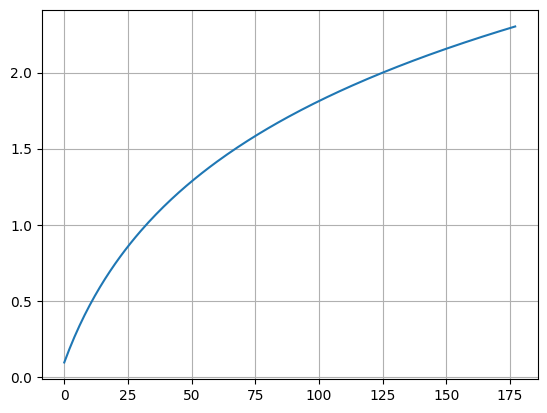

In [15]:
w=np.log(np.linspace(1.1,10,178))
plt.plot(w)
plt.grid()

In [16]:
np.average(df_wine.alcohol, weights=w)

12.859993934850285

##Media geométrica

In [17]:
media_geometrica=stats.gmean(df_wine)
media_geometrica

array([1.29752784e+01, 2.10655027e+00, 2.35006078e+00, 1.92047930e+01,
       9.87945076e+01, 2.20614882e+00, 1.72633531e+00, 3.40592502e-01,
       1.48269582e+00, 4.56323347e+00, 9.28760027e-01, 2.50412397e+00,
       6.85605753e+02])

In [18]:
media=np.mean(df_wine,axis=0)
media

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [19]:
(media>media_geometrica).sum()

13

In [20]:
media.shape

(13,)

##Media armónica

In [21]:
media_armonica=stats.hmean(df_wine)
media_armonica

array([1.29498207e+01, 1.91402549e+00, 2.33268680e+00, 1.89038316e+01,
       9.79056615e+01, 2.11425211e+00, 1.39305807e+00, 3.19560143e-01,
       1.36201459e+00, 4.10641888e+00, 8.98573781e-01, 2.38715250e+00,
       6.30550129e+02])

In [22]:
(media_armonica>media_geometrica).sum()

0

##Mediana

In [23]:
np.median(df_wine,axis=0) #A partir de numpy

array([1.305e+01, 1.865e+00, 2.360e+00, 1.950e+01, 9.800e+01, 2.355e+00,
       2.135e+00, 3.400e-01, 1.555e+00, 4.690e+00, 9.650e-01, 2.780e+00,
       6.735e+02])

In [24]:
df_wine.median() #A partir de pandas

alcohol                          13.050
malic_acid                        1.865
ash                               2.360
alcalinity_of_ash                19.500
magnesium                        98.000
total_phenols                     2.355
flavanoids                        2.135
nonflavanoid_phenols              0.340
proanthocyanins                   1.555
color_intensity                   4.690
hue                               0.965
od280/od315_of_diluted_wines      2.780
proline                         673.500
dtype: float64

##Moda

In [25]:
stats.mode(df_wine.alcohol) #A partir de stats se muestran las veces que se repite la incidencia más frecuente

ModeResult(mode=12.37, count=6)

In [26]:
df_wine.alcohol.mode() #A partir de pandas se muestran todas la incidencias que más se repiten

0    12.37
1    13.05
Name: alcohol, dtype: float64

##Cuantil o percentil

In [27]:
np.quantile(df_wine['alcohol'],0.25)

12.362499999999999

In [28]:
np.quantile(df_wine['alcohol'],[0.25,0.5,0.75])

array([12.3625, 13.05  , 13.6775])

In [29]:
np.quantile(df_wine,[0.25,0.5,0.75],axis=0)

array([[1.23625e+01, 1.60250e+00, 2.21000e+00, 1.72000e+01, 8.80000e+01,
        1.74250e+00, 1.20500e+00, 2.70000e-01, 1.25000e+00, 3.22000e+00,
        7.82500e-01, 1.93750e+00, 5.00500e+02],
       [1.30500e+01, 1.86500e+00, 2.36000e+00, 1.95000e+01, 9.80000e+01,
        2.35500e+00, 2.13500e+00, 3.40000e-01, 1.55500e+00, 4.69000e+00,
        9.65000e-01, 2.78000e+00, 6.73500e+02],
       [1.36775e+01, 3.08250e+00, 2.55750e+00, 2.15000e+01, 1.07000e+02,
        2.80000e+00, 2.87500e+00, 4.37500e-01, 1.95000e+00, 6.20000e+00,
        1.12000e+00, 3.17000e+00, 9.85000e+02]])

In [30]:
df_wine.quantile([0.25,0.5,0.75])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0.25,12.3625,1.6025,2.2100,17.2,88.0,1.7425,1.205,0.2700,1.250,3.22,0.7825,1.9375,500.5
0.50,13.0500,1.8650,2.3600,19.5,98.0,2.3550,2.135,0.3400,1.555,4.69,0.9650,2.7800,673.5
0.75,13.6775,3.0825,2.5575,21.5,107.0,2.8000,2.875,0.4375,1.950,6.20,1.1200,3.1700,985.0


In [31]:
np.percentile(df_wine.alcohol,25) #En este caso el % va de 0 a 100

12.362499999999999

#Medidas de disperción

##Varianza y desviación estándar

In [32]:
#Numpy asume que los datos son poblacionales
#Pandas asume que los datos son muestrales

np.var(df_wine['alcohol'])

0.6553597304633255

In [33]:
df_wine['alcohol'].var()

0.6590623278105759

In [34]:
df_wine['alcohol'].var(ddof=0)

0.6553597304633255

In [35]:
np.sqrt(np.var(df_wine['alcohol'])) #La desviación estándar es la raíz de la varianza

0.8095429145285168

In [36]:
np.std(df_wine['alcohol'])

0.8095429145285168

In [37]:
df_wine['alcohol'].std()

0.8118265380058575

In [38]:
df_wine['alcohol'].std(ddof=0)

0.8095429145285168

##Rango

In [39]:
np.max(df_wine['alcohol'])-np.min(df_wine['alcohol'])

3.8000000000000007

In [41]:
X=df_wine['alcohol']
X.max()-X.min()

3.8000000000000007

In [43]:
np.ptp(X)

3.8000000000000007

In [42]:
np.ptp(df_wine,axis=0)

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
dtype: float64

##Rango intercuartílico

In [46]:
Q=np.quantile(X,[0.25,0.75])
Q

array([12.3625, 13.6775])

In [47]:
iqr=Q[1]-Q[0]

In [49]:
Q=X.quantile([0.25,0.75])
Q

0.25    12.3625
0.75    13.6775
Name: alcohol, dtype: float64

In [50]:
Q[0.75]-Q[0.25]

1.3150000000000013

In [56]:
#Todas las variables con numpy
Q=np.quantile(df_wine,[0.25,0.75])
Q.shape

(2,)

In [53]:
Q

array([[1.23625e+01, 1.60250e+00, 2.21000e+00, 1.72000e+01, 8.80000e+01,
        1.74250e+00, 1.20500e+00, 2.70000e-01, 1.25000e+00, 3.22000e+00,
        7.82500e-01, 1.93750e+00, 5.00500e+02],
       [1.36775e+01, 3.08250e+00, 2.55750e+00, 2.15000e+01, 1.07000e+02,
        2.80000e+00, 2.87500e+00, 4.37500e-01, 1.95000e+00, 6.20000e+00,
        1.12000e+00, 3.17000e+00, 9.85000e+02]])

In [58]:
#Todas las variables con pandas
Q=df_wine.quantile([0.25,0.75])
Q

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0.25,12.3625,1.6025,2.2100,17.2,88.0,1.7425,1.205,0.2700,1.25,3.22,0.7825,1.9375,500.5
0.75,13.6775,3.0825,2.5575,21.5,107.0,2.8000,2.875,0.4375,1.95,6.20,1.1200,3.1700,985.0


In [59]:
Q.loc[0.75]-Q.loc[0.25]

alcohol                           1.3150
malic_acid                        1.4800
ash                               0.3475
alcalinity_of_ash                 4.3000
magnesium                        19.0000
total_phenols                     1.0575
flavanoids                        1.6700
nonflavanoid_phenols              0.1675
proanthocyanins                   0.7000
color_intensity                   2.9800
hue                               0.3375
od280/od315_of_diluted_wines      1.2325
proline                         484.5000
dtype: float64

In [60]:
Q.iloc[1]-Q.iloc[0]

alcohol                           1.3150
malic_acid                        1.4800
ash                               0.3475
alcalinity_of_ash                 4.3000
magnesium                        19.0000
total_phenols                     1.0575
flavanoids                        1.6700
nonflavanoid_phenols              0.1675
proanthocyanins                   0.7000
color_intensity                   2.9800
hue                               0.3375
od280/od315_of_diluted_wines      1.2325
proline                         484.5000
dtype: float64

In [61]:
stats.iqr(X)

1.3150000000000013

##Coeficiente de variación de Pearson

In [64]:
s=np.std(df_wine,axis=0)  #Desviación estándar
s

alcohol                           0.809543
malic_acid                        1.114004
ash                               0.273572
alcalinity_of_ash                 3.330170
magnesium                        14.242308
total_phenols                     0.624091
flavanoids                        0.996049
nonflavanoid_phenols              0.124103
proanthocyanins                   0.570749
color_intensity                   2.311765
hue                               0.227929
od280/od315_of_diluted_wines      0.707993
proline                         314.021657
dtype: float64

In [65]:
nm=np.abs(np.mean(df_wine,axis=0))
nm

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [66]:
s/nm

alcohol                         0.062270
malic_acid                      0.476814
ash                             0.115601
alcalinity_of_ash               0.170822
magnesium                       0.142792
total_phenols                   0.271922
flavanoids                      0.490841
nonflavanoid_phenols            0.342965
proanthocyanins                 0.358759
color_intensity                 0.457043
hue                             0.238058
od280/od315_of_diluted_wines    0.271087
proline                         0.420437
dtype: float64

array([[<Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'proline'}>]], dtype=object)

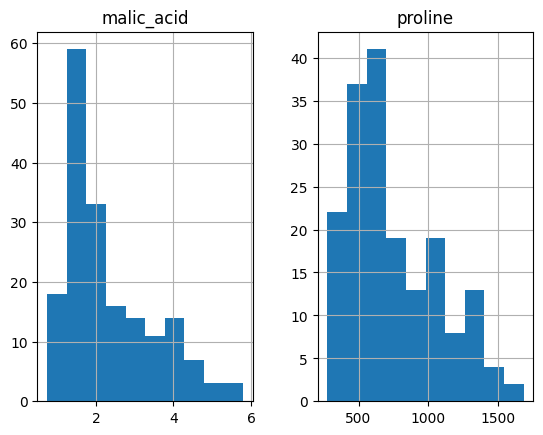

In [67]:
df_wine[['malic_acid','proline']].hist()

##Medidas de forma

In [68]:
X.skew()

-0.051482331077134784

<Axes: >

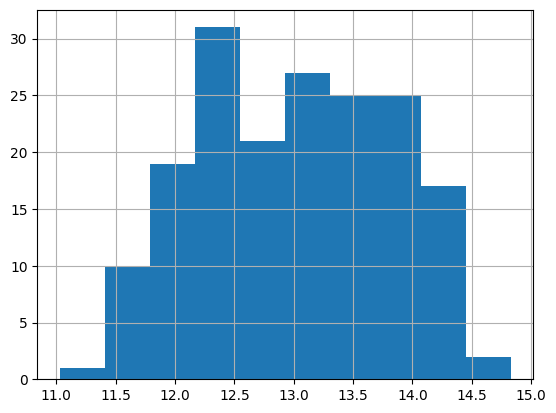

In [69]:
X.hist()

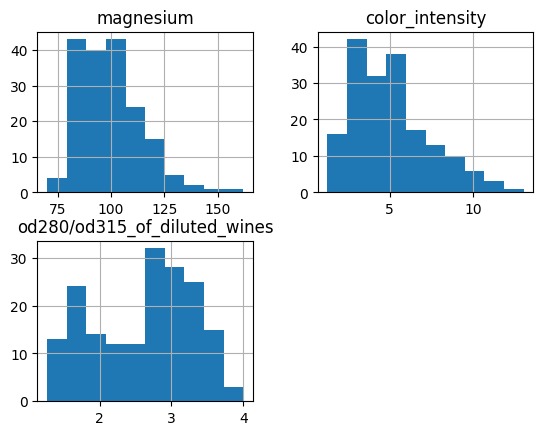

In [72]:
H=df_wine[['magnesium','color_intensity','od280/od315_of_diluted_wines']].hist()

##Curtósis

In [73]:
X.kurt()

-0.8524995684849164

In [74]:
df_wine.kurt()

alcohol                        -0.852500
malic_acid                      0.299207
ash                             1.143978
alcalinity_of_ash               0.487942
magnesium                       2.104991
total_phenols                  -0.835627
flavanoids                     -0.880382
nonflavanoid_phenols           -0.637191
proanthocyanins                 0.554649
color_intensity                 0.381522
hue                            -0.344096
od280/od315_of_diluted_wines   -1.086435
proline                        -0.248403
dtype: float64

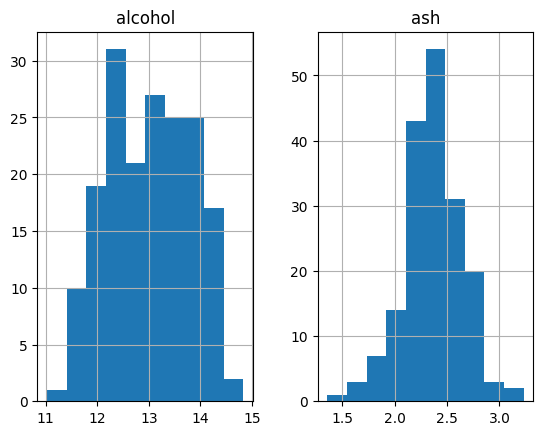

In [75]:
H=df_wine[['alcohol','ash']].hist()